In [1]:
%autosave 0

Autosave disabled


In [2]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

2023-11-11 19:02:08.158535: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Tensor Flow Version: 2.9.1

Python 3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:45:29) 
[GCC 10.4.0]
Pandas 1.4.2
Scikit-Learn 1.3.2
GPU is available


2023-11-11 19:02:10.324059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 19:02:10.330965: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 19:02:10.331234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [3]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

In [4]:
# !pip install scipy

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
import timeit

start_time = timeit.timeit()

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

In [6]:
start_time = timeit.default_timer()
print("The notebook starting time  is :", start_time)

In [7]:
from tensorflow.keras.preprocessing.image import load_img

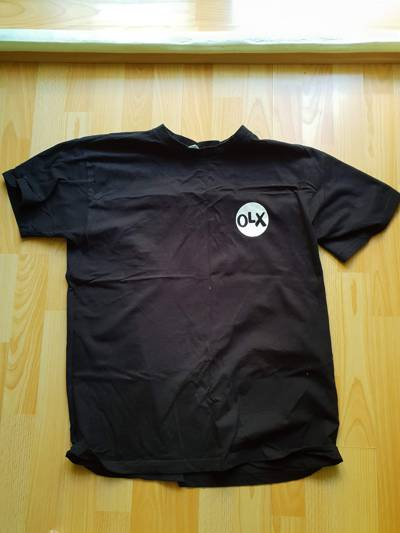

In [8]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [9]:
img = load_img(fullname, target_size=(299, 299))

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-11-11 19:02:11.131493: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-11 19:02:11.131998: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 19:02:11.132310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-11 19:02:11.132506: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

In [13]:
X = np.array([x])

In [14]:
X.shape

(1, 299, 299, 3)

In [15]:
X = preprocess_input(X)

In [16]:
pred = model.predict(X)

2023-11-11 19:02:14.501218: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-11 19:02:15.164729: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-11 19:02:15.165307: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-11 19:02:15.165356: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-11 19:02:15.166023: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-11 19:02:15.166128: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [17]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

Because imagenet 

> offer tens of millions of cleanly labeled and sorted images for most of the concepts in the WordNet hierarchy

the images may not be what we are trying to classify for our own projects. So, the need of transfer learning / reinforcement learning, using our own dense layers by excluding Xception's dense layers with `include_top=False` when we train with our own images.

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [20]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [21]:
X, y = next(train_ds)

In [22]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [24]:
base_model = Xception(
    weights='imagenet',
    include_top=False,          # do not include Dense layers
    input_shape=(150, 150, 3)
)

base_model.trainable = False    # freeze convolutional layers

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)       # the "long thing"

vectors = keras.layers.GlobalAveragePooling2D()(base) # slice the "long thing"

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 4s 0us/step


In [25]:
learning_rate = 0.01
# more than Adam optimizers exists, experiment!
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)  

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
# 5mins

Epoch 1/10
96/96 [==============================] - 18s 153ms/step - loss: 1.2565 - accuracy: 0.6685 - val_loss: 0.7588 - val_accuracy: 0.8006
Epoch 2/10
96/96 [==============================] - 13s 132ms/step - loss: 0.4985 - accuracy: 0.8325 - val_loss: 0.9007 - val_accuracy: 0.7830
Epoch 3/10
96/96 [==============================] - 13s 130ms/step - loss: 0.3431 - accuracy: 0.8804 - val_loss: 0.9781 - val_accuracy: 0.7801
Epoch 4/10
96/96 [==============================] - 13s 131ms/step - loss: 0.2484 - accuracy: 0.9097 - val_loss: 0.9450 - val_accuracy: 0.7683
Epoch 5/10
96/96 [==============================] - 13s 131ms/step - loss: 0.2080 - accuracy: 0.9289 - val_loss: 1.0093 - val_accuracy: 0.7654
Epoch 6/10
96/96 [==============================] - 13s 131ms/step - loss: 0.1697 - accuracy: 0.9387 - val_loss: 1.2011 - val_accuracy: 0.7742
Epoch 7/10
96/96 [==============================] - 13s 131ms/step - loss: 0.0950 - accuracy: 0.9648 - val_loss: 0.9620 - val_accuracy: 0.7947

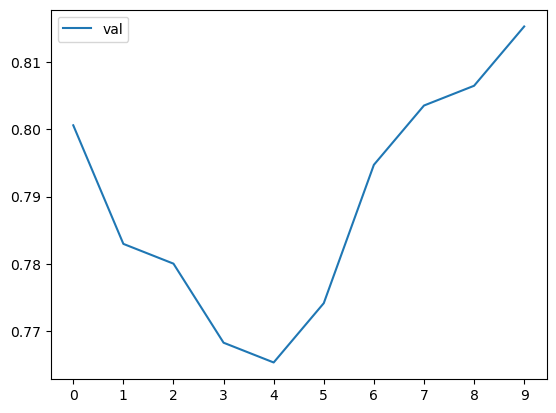

In [27]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [28]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [29]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()
    
    # 17mins

0.0001
Epoch 1/10
96/96 [==============================] - 16s 139ms/step - loss: 2.0156 - accuracy: 0.3214 - val_loss: 1.6818 - val_accuracy: 0.4809
Epoch 2/10
96/96 [==============================] - 13s 130ms/step - loss: 1.4252 - accuracy: 0.5580 - val_loss: 1.2793 - val_accuracy: 0.6217
Epoch 3/10
96/96 [==============================] - 13s 131ms/step - loss: 1.1563 - accuracy: 0.6444 - val_loss: 1.0735 - val_accuracy: 0.6950
Epoch 4/10
96/96 [==============================] - 13s 133ms/step - loss: 1.0070 - accuracy: 0.6933 - val_loss: 0.9589 - val_accuracy: 0.7302
Epoch 5/10
96/96 [==============================] - 13s 132ms/step - loss: 0.9105 - accuracy: 0.7138 - val_loss: 0.8753 - val_accuracy: 0.7595
Epoch 6/10
96/96 [==============================] - 14s 144ms/step - loss: 0.8425 - accuracy: 0.7386 - val_loss: 0.8191 - val_accuracy: 0.7713
Epoch 7/10
96/96 [==============================] - 13s 132ms/step - loss: 0.7893 - accuracy: 0.7539 - val_loss: 0.7776 - val_accuracy:

In [30]:
# del scores[0.1]
# del scores[0.0001]

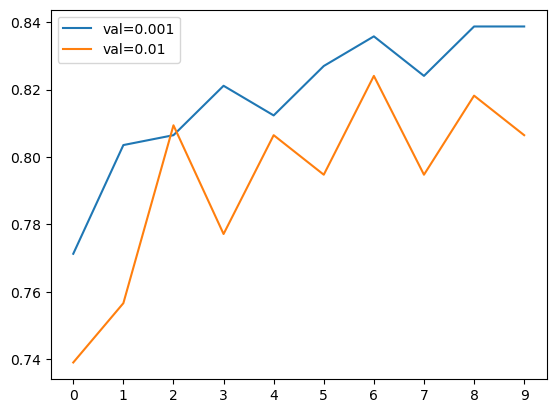

In [31]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [32]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [33]:
model.save_weights('model_v1.h5', save_format='h5')

In [34]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [35]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)
# 5mins

Epoch 1/10
96/96 [==============================] - 16s 143ms/step - loss: 1.0850 - accuracy: 0.6317 - val_loss: 0.7049 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 13s 134ms/step - loss: 0.6289 - accuracy: 0.7911 - val_loss: 0.6195 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 13s 135ms/step - loss: 0.5076 - accuracy: 0.8321 - val_loss: 0.5817 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 13s 131ms/step - loss: 0.4284 - accuracy: 0.8664 - val_loss: 0.5868 - val_accuracy: 0.8035
Epoch 5/10
96/96 [==============================] - 13s 132ms/step - loss: 0.3728 - accuracy: 0.8856 - val_loss: 0.5453 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 13s 134ms/step - loss: 0.3255 - accuracy: 0.9055 - val_loss: 0.5410 - val_accuracy: 0.8270
Epoch 7/10
96/96 [==============================] - 13s 134ms/step - loss: 0.2902 - accuracy: 0.9218 - val_loss: 0.5274 - val_accuracy: 0.8299

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [36]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()
# 12mins

10
Epoch 1/10
96/96 [==============================] - 16s 140ms/step - loss: 1.4308 - accuracy: 0.5277 - val_loss: 1.0269 - val_accuracy: 0.6393
Epoch 2/10
96/96 [==============================] - 13s 130ms/step - loss: 0.9277 - accuracy: 0.6884 - val_loss: 0.8132 - val_accuracy: 0.7302
Epoch 3/10
96/96 [==============================] - 13s 131ms/step - loss: 0.7080 - accuracy: 0.7634 - val_loss: 0.6864 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 13s 132ms/step - loss: 0.5861 - accuracy: 0.8074 - val_loss: 0.5987 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 13s 132ms/step - loss: 0.4919 - accuracy: 0.8429 - val_loss: 0.5964 - val_accuracy: 0.8035
Epoch 6/10
96/96 [==============================] - 13s 131ms/step - loss: 0.4259 - accuracy: 0.8683 - val_loss: 0.6007 - val_accuracy: 0.7977
Epoch 7/10
96/96 [==============================] - 13s 132ms/step - loss: 0.3715 - accuracy: 0.8875 - val_loss: 0.5857 - val_accuracy: 0.8

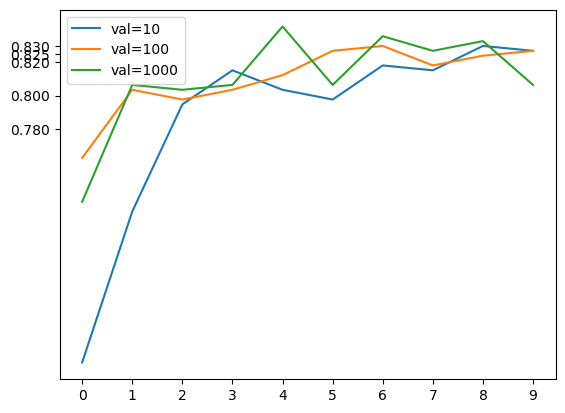

In [38]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [39]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [40]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()
#  50mins

0.0
Epoch 1/30
96/96 [==============================] - 16s 142ms/step - loss: 0.9757 - accuracy: 0.6574 - val_loss: 0.6451 - val_accuracy: 0.8035
Epoch 2/30
96/96 [==============================] - 13s 132ms/step - loss: 0.5268 - accuracy: 0.8198 - val_loss: 0.5895 - val_accuracy: 0.8182
Epoch 3/30
96/96 [==============================] - 12s 129ms/step - loss: 0.3628 - accuracy: 0.8761 - val_loss: 0.5775 - val_accuracy: 0.8065
Epoch 4/30
96/96 [==============================] - 12s 128ms/step - loss: 0.2645 - accuracy: 0.9185 - val_loss: 0.6006 - val_accuracy: 0.8065
Epoch 5/30
96/96 [==============================] - 13s 131ms/step - loss: 0.1823 - accuracy: 0.9550 - val_loss: 0.5703 - val_accuracy: 0.8358
Epoch 6/30
96/96 [==============================] - 13s 131ms/step - loss: 0.1260 - accuracy: 0.9707 - val_loss: 0.5974 - val_accuracy: 0.8328
Epoch 7/30
96/96 [==============================] - 12s 129ms/step - loss: 0.0938 - accuracy: 0.9853 - val_loss: 0.6038 - val_accuracy: 0.

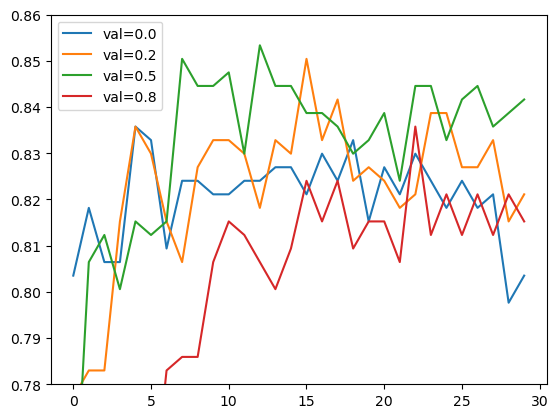

In [41]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

# plt.ylim(0.78, 0.86)
plt.legend()

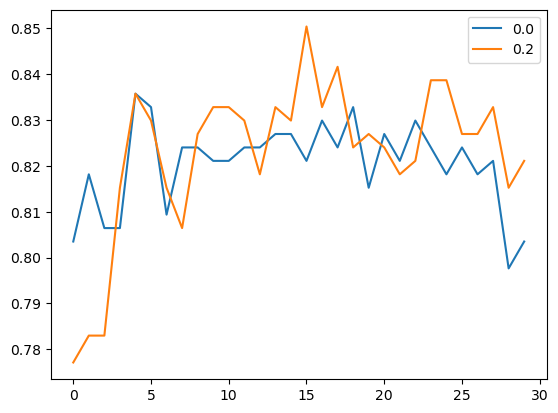

In [42]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [43]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [44]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)
# 20mins

Epoch 1/50
96/96 [==============================] - 15s 134ms/step - loss: 1.0630 - accuracy: 0.6362 - val_loss: 0.6543 - val_accuracy: 0.7771
Epoch 2/50
96/96 [==============================] - 12s 124ms/step - loss: 0.6118 - accuracy: 0.7904 - val_loss: 0.6524 - val_accuracy: 0.7742
Epoch 3/50
96/96 [==============================] - 12s 125ms/step - loss: 0.4773 - accuracy: 0.8315 - val_loss: 0.5330 - val_accuracy: 0.8270
Epoch 4/50
96/96 [==============================] - 12s 125ms/step - loss: 0.3703 - accuracy: 0.8758 - val_loss: 0.4980 - val_accuracy: 0.8299
Epoch 5/50
96/96 [==============================] - 12s 128ms/step - loss: 0.2803 - accuracy: 0.9029 - val_loss: 0.5257 - val_accuracy: 0.8182
Epoch 6/50
96/96 [==============================] - 12s 126ms/step - loss: 0.2192 - accuracy: 0.9302 - val_loss: 0.5189 - val_accuracy: 0.8387
Epoch 7/50
96/96 [==============================] - 12s 128ms/step - loss: 0.1655 - accuracy: 0.9524 - val_loss: 0.5367 - val_accuracy: 0.8240

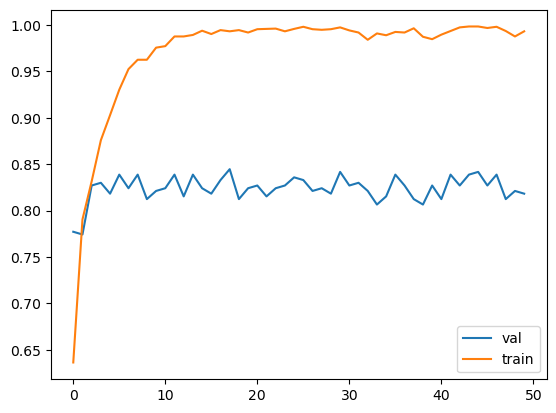

In [45]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [46]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [47]:
input_size = 299

In [48]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [49]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [50]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

# took 50 mins wsl+gpu

Epoch 1/50
96/96 [==============================] - 73s 726ms/step - loss: 1.0063 - accuracy: 0.6858 - val_loss: 0.5813 - val_accuracy: 0.7977
Epoch 2/50
96/96 [==============================] - 67s 700ms/step - loss: 0.5241 - accuracy: 0.8279 - val_loss: 0.4348 - val_accuracy: 0.8446
Epoch 3/50
96/96 [==============================] - 68s 708ms/step - loss: 0.4153 - accuracy: 0.8592 - val_loss: 0.4451 - val_accuracy: 0.8622
Epoch 4/50
96/96 [==============================] - 68s 704ms/step - loss: 0.3842 - accuracy: 0.8706 - val_loss: 0.3911 - val_accuracy: 0.8768
Epoch 5/50
96/96 [==============================] - 67s 700ms/step - loss: 0.3335 - accuracy: 0.8849 - val_loss: 0.3559 - val_accuracy: 0.8827
Epoch 6/50
96/96 [==============================] - 68s 708ms/step - loss: 0.3206 - accuracy: 0.8853 - val_loss: 0.3711 - val_accuracy: 0.8739
Epoch 7/50
96/96 [==============================] - 68s 706ms/step - loss: 0.2944 - accuracy: 0.8957 - val_loss: 0.3495 - val_accuracy: 0.8798

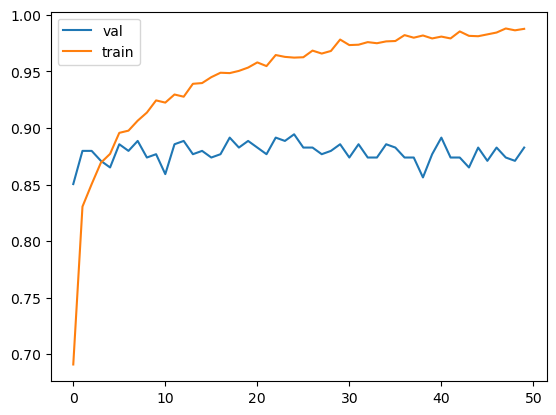

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [53]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [55]:
model = keras.models.load_model('xception_v4_1_13_0.891.h5')

In [56]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 279ms/step - loss: 0.2425 - accuracy: 0.9140


[0.2424730509519577, 0.9139785170555115]

In [57]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [58]:
img = load_img(path, target_size=(299, 299))

In [59]:
import numpy as np

In [60]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [61]:
X = preprocess_input(X)

In [62]:
pred = model.predict(X)

1/1 [==============================] - 1s 947ms/step


In [63]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [64]:
dict(zip(classes, pred[0]))

{'dress': -2.9972908,
 'hat': -5.2164893,
 'longsleeve': -0.80898654,
 'outwear': -1.8032178,
 'pants': 8.87573,
 'shirt': -2.6035316,
 'shoes': -4.6188254,
 'shorts': 2.7917607,
 'skirt': -4.529895,
 't-shirt': -2.6585767}

In [82]:
# Run the op several times.
print('Time (s) to run notebook in local vs-code with GTX 970')

cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(f'CPU (s): {cpu_time}')
print()

gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(f'GPU (s): {gpu_time}')
print()
print(f'GPU speedup over CPU: {int(cpu_time/gpu_time)}x')

Time (s) to run notebook in Colab with T4 hosted runtime.
CPU (s):


0.790042705993983
GPU (s):
0.36908410300384276
GPU speedup over CPU: 2x


[elapsed to timedelta](https://stackoverflow.com/a/51846797)<br>
[timedelta components](https://stackoverflow.com/a/2119512)

In [106]:
import datetime

def days_hours_minutes(td):
    return td.seconds//3600, (td.seconds//60)%60

elapsed = timeit.default_timer() - start_time
hours, mins = days_hours_minutes(datetime.timedelta(seconds=elapsed))

print(f"The notebook completion time  is : {hours} hours and {mins} minutes")

The notebook completion time  is : 3 hours and 21 minutes


## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images



## 8.15 Hyperparameter optimization with KerasTuner

In [84]:
# !pip install keras-tuner --upgrade

In [85]:
import os  
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  

In [86]:
import keras_tuner
from tensorflow import keras

In [87]:
learning_rate = [0.0001, 0.001, 0.01, 0.1]
size = [10, 100, 1000]
droprate = [0.0, 0.2, 0.5, 0.8]

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

base_model = Xception(
    weights='imagenet',
    include_top=False,          # do not include Dense layers
    input_shape=(150, 150, 3)
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [88]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(10, activation="softmax"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

NameError: name 'layers' is not defined

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
best_model = tuner.get_best_models()[0]